> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate dataset “income per capita” and other sets to find what parameter or set of them have more influence on income of people in Belarus and other countries that stay in same group.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have chosen next data sets: "Income per capita", "Debt to foreigns", "Electricity generated", "Happy score index", "Human developments index", "Trade balance", "Population total".
The main question to this sets is highlighted in the project name.
Also, I want to investigate how different countries that have the same income as Belarus in 1990, grown and what parameters from choosen list have more influence on their growth.


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
#First of all let's make df and explore them
hap_score = pd.read_csv('hapiscore_whr.csv')
foreign_depts = pd.read_csv('debt_to_foreigners_by_public_and_private_percent_of_gni.csv')
elect_generated = pd.read_csv('electricity_generation_total.csv')
human_develop = pd.read_csv('hdi_human_development_index.csv')
income_per_capita = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
pop_total = pd.read_csv('population_total.csv')
trade_bal = pd.read_csv('trade_balance_us_not_inflation_adjusted.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [112]:
df_list = [hap_score,foreign_depts,elect_generated,human_develop,income_per_capita,pop_total,trade_bal] #make iterabel list of data frames
df_names = ['happy_score','foreign_depts','electricity_generated','human_develop','income_per_capita','population_total','trade_balance'] #make same list of names
for df, name in zip(df_list,df_names): #look at datasets info
    print('\n',name)
    print(df.info())


 happy_score
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     113 non-null    float64
 6   2010     123 non-null    float64
 7   2011     145 non-null    float64
 8   2012     140 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     134 non-null    float64
 15  2019     151 non-null    float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB
None

 foreign_depts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 51 columns):
 #   Column   Non

In [113]:
for df, name in zip(df_list,df_names): #look at datasets head
    print('\n',name)
    print(df.head(1))
#Funny thing down there: datasets of income have information up to the year 2040, and population total got information up to the year 2100. Maybe authors know something about our future?


 happy_score
       country  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
0  Afghanistan   NaN   NaN   NaN  37.2  44.0  47.6  38.3  37.8  35.7  31.3   

   2015  2016  2017  2018  2019  
0  39.8  42.2  26.6  26.9  25.7  

 foreign_depts
       country  1970  1971  1972  1973  1974  1975  1976  1977  1978  ...  \
0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

   2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
0  15.3  14.0  12.9  12.5  12.4  12.9  13.3  13.5  13.6  13.7  

[1 rows x 51 columns]

 electricity_generated
                country   1985   1986   1987   1988   1989   1990   1991  \
0  United Arab Emirates  12.2B  12.8B  13.7B  14.8B  15.6B  17.1B  17.2B   

    1992   1993  ...   2010   2011  2012  2013  2014  2015  2016  2017  2018  \
0  18.7B  21.7B  ...  93.9B  99.1B  106B  110B  117B  127B  130B  135B  136B   

   2019  
0  138B  

[1 rows x 36 columns]

 human_develop
       country   1990   1991   1992   1993

In [114]:
#let's check how many columns have each dataste
df_columns = [x.columns for x in df_list] #this make list of lists of columns in each dataset, so i can check length of them
for length, names in zip(df_columns,df_names):
    print(names, len(length))

happy_score 16
foreign_depts 51
electricity_generated 36
human_develop 30
income_per_capita 242
population_total 302
trade_balance 61


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In case that I want to have a look at the behavior of different countries threw the year 1990 let's define a function to ease those steps in future

In [276]:
def create_country_df(country_df, df_lists, df_columns,df_names,country_name):
    x=0 #need this counter to ease my access to names of columns
    for df in df_lists:
        if ''.join(df_columns[1:]) in ''.join(df.columns):  #check if data frame that we plan to join has the same columns as the initial data frame (this is done to remove exceptions)
            country_df = country_df.append(df.loc[df.country == country_name,df_columns]) # if the data frame has the same set of columns we slice only columns that we need and append them
        else:
            country_df = country_df.append(df.loc[df.country == country_name]) #if not, we join columns that new data frame already have
        country_df.iloc[x,0] = df_names[x] #add the name to the row, so we can identify it
        x+=1
    country_df = country_df.swapaxes('index','columns')[1:] #swap axes of data frame so information in columns stored in the normal way. Also, drop the first row, this row contains column names
    country_df.columns = df_names #before this action column names were named using indices
    country_df.reset_index(inplace=True) #in indices before this action was stored information about years. Now we have column with years.
    country_df.rename(columns = {'index':'year'}, inplace = True)
    return country_df

#### As my main goal is to check how Belarus is growing since the 1990 let's make one dataset that contains all parameters associated with Belarus

In [281]:
#Human developments index have all years that I want to investigate so let's use it columns to make data frame of Belarus
df_columns = list(human_develop.columns)+['2019']
belarus_df = pd.DataFrame(columns=df_columns) #create empty data frame for Belarus
belarus_df = create_country_df(belarus_df,df_list,df_columns,df_names,'Belarus') #let's create data frame that contains different information only about Belarus
belarus_df

,year,happy_score,foreign_depts,electricity_generated,human_develop,income_per_capita,population_total,trade_balance
0,1990,NaN,NaN,39.5B,NaN,8370,10.2M,500M
1,1991,NaN,NaN,38.7B,NaN,8260,10.2M,0
2,1992,NaN,NaN,37.6B,NaN,7450,10.2M,370M
3,1993,NaN,5.95,33.4B,NaN,6870,10.1M,−2.56B
4,1994,NaN,8.73,31.4B,NaN,6070,10.1M,−1.92B
5,1995,NaN,12.2,24.9B,0.656,5460,10.1M,−613M
6,1996,NaN,13.3,23.7B,0.661,5630,10M,−601M
7,1997,NaN,14.8,26.1B,0.667,6300,10M,−819M
8,1998,NaN,15.8,23.5B,0.671,6860,9.97M,−739M
9,1999,NaN,22.3,26.5B,0.676,7130,9.92M,−295M


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [282]:
belarus_df.info() #all my columns contains objects, but let's check up for sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   30 non-null     object
 1   happy_score            14 non-null     object
 2   foreign_depts          27 non-null     object
 3   electricity_generated  30 non-null     object
 4   human_develop          24 non-null     object
 5   income_per_capita      30 non-null     object
 6   population_total       30 non-null     object
 7   trade_balance          30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [283]:
#let's clear data. First of all: indecies should be in range 0-100, all money will be represented in billions, and insted of storing income per capita let's create income of country.
#in case that we shoul repeat this with other countries, let's try to create function for this.
problem = belarus_df.trade_balance[3][0] #catch problem there: symbol '−' cannot be converted to float. Si store it for future replacements in function
def data_wrangl(df,problem):
    df.happy_score = df.happy_score.astype('float') #change type of data from string to float
    df.foreign_depts = df.foreign_depts.astype('float') #change type of data from string to float
    df.human_develop = df.human_develop.astype('float')*100 #change type of data from string to float and multiply by 100 so all indecies be in same range
    df.electricity_generated = df.electricity_generated.apply(lambda x: float(x[:-1])) #remove B in edn of each string and convert string to float
    df.population_total = df.population_total.apply(lambda x: float(x[:-1])) #remove M in end of each string and convert string to float
    df.income_per_capita = df.income_per_capita.apply(lambda x: float(x[:-1]) if 'k' in x else float(x)/1000)*df.population_total #convert all values to thousands, then multiply by population
    df.trade_balance = df.trade_balance.apply(lambda x: x.replace(problem,'-')) #replaced problematic symbol with normal dash, so now it could be converted to float.
    df.trade_balance = df.trade_balance.apply(lambda x: float(x[:-1]) if 'B' in x else (float(x[:-1])/1000 if 'M' in x else float(x)/1000)) #conver to float and then transfrom all values to billions
    df.rename(columns = {'income_per_capita':'income'},inplace=True) #rename column
    return df

belarus_df = data_wrangl(belarus_df,problem)
belarus_df

,year,happy_score,foreign_depts,electricity_generated,human_develop,income,population_total,trade_balance
0,1990,NaN,NaN,39.5,NaN,85.3740,10.20,0.5000
1,1991,NaN,NaN,38.7,NaN,84.2520,10.20,0.0000
2,1992,NaN,NaN,37.6,NaN,75.9900,10.20,0.3700
3,1993,NaN,5.95,33.4,NaN,69.3870,10.10,-2.5600
4,1994,NaN,8.73,31.4,NaN,61.3070,10.10,-1.9200
5,1995,NaN,12.20,24.9,65.6,55.1460,10.10,-0.6130
6,1996,NaN,13.30,23.7,66.1,56.3000,10.00,-0.6010
7,1997,NaN,14.80,26.1,66.7,63.0000,10.00,-0.8190
8,1998,NaN,15.80,23.5,67.1,68.3942,9.97,-0.7390
9,1999,NaN,22.30,26.5,67.6,70.7296,9.92,-0.2950


In [284]:
belarus_df.corr() #let's check correlation of values

,happy_score,foreign_depts,electricity_generated,human_develop,income,population_total,trade_balance
happy_score,1.000000,-0.302460,-0.329093,-0.128430,-0.047178,-0.037140,-0.026975
foreign_depts,-0.302460,1.000000,0.661763,0.890660,0.886727,-0.767860,0.144546
electricity_generated,-0.329093,0.661763,1.000000,0.895860,0.551236,-0.210506,-0.009087
human_develop,-0.128430,0.890660,0.895860,1.000000,0.996950,-0.939094,-0.115685
income,-0.047178,0.886727,0.551236,0.996950,1.000000,-0.889857,-0.095975
population_total,-0.037140,-0.767860,-0.210506,-0.939094,-0.889857,1.000000,0.214570
trade_balance,-0.026975,0.144546,-0.009087,-0.115685,-0.095975,0.214570,1.000000


array([[<AxesSubplot:title={'center':'happy_score'}>,
        <AxesSubplot:title={'center':'foreign_depts'}>,
        <AxesSubplot:title={'center':'electricity_generated'}>],
       [<AxesSubplot:title={'center':'human_develop'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'population_total'}>],
       [<AxesSubplot:title={'center':'trade_balance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

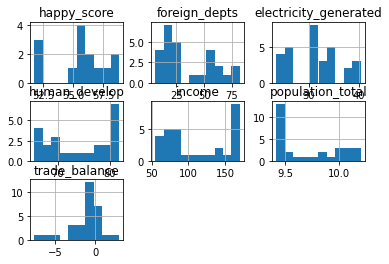

In [287]:
belarus_df.hist()

In [286]:
df.head()

,year,happy_score,foreign_depts,electricity_generated,human_develop,income,population_total,trade_balance
0,1990,NaN,NaN,39.5,NaN,85.374,10.2,0.50
1,1991,NaN,NaN,38.7,NaN,84.252,10.2,0.00
2,1992,NaN,NaN,37.6,NaN,75.990,10.2,0.37
3,1993,NaN,5.95,33.4,NaN,69.387,10.1,-2.56
4,1994,NaN,8.73,31.4,NaN,61.307,10.1,-1.92


In [252]:
df.iloc[:,2] = df.iloc[:,2]/df.iloc[:,6]
df.head()

,year,happy_score,foreign_depts(k_usd),electricity_generated,human_develop,income_per_capita(k_usd),population_total(k),trade_balance(k_usd)
0,1990,NaN,NaN,39500.0,NaN,8.37,10200.0,500000.0
1,1991,NaN,NaN,38700.0,NaN,8.26,10200.0,0.0
2,1992,NaN,NaN,37600.0,NaN,7.45,10200.0,370000.0
3,1993,NaN,589.108911,33400.0,NaN,6.87,10100.0,-2560000.0
4,1994,NaN,864.356436,31400.0,NaN,6.07,10100.0,-1920000.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!